<h2> Importing the Dependencies </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

<h2> Importing the data </h2>
<h5> Data Collection and Processing </h5>

In [2]:
# Loading the data from csv to DataFrame
car_dataset = pd.read_csv('C:/Users/hakim/OneDrive/Bureau/ENSI/ML Projects/Car Price Prediction using linear regression/car data.csv')

In [3]:
# Inspecting the data
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Checking the number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# Getting some information about the Dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#Checking missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
#Checking the distribution of categorical data
print("Fuel Types: \n",car_dataset.Fuel_Type.value_counts(),
      "\nSeller Types: \n",car_dataset.Seller_Type.value_counts(),
      "\nTransmission Types: \n",car_dataset.Transmission.value_counts())

Fuel Types: 
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 
Seller Types: 
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 
Transmission Types: 
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


<h3> Encoding the Categorical Data </h3>

In [12]:
# Encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace= True)

# Encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace= True)

# Encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace= True)

In [13]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<h2> Splitting the data into Training Data and Target

In [14]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

<h2> Splitting the data into Training Data and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

<h2> Model Training </h2>
<h5> Linear Regression</h5>

In [17]:
#Loading the linear Regression Model
lin_reg_model = LinearRegression()

In [18]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

<h5> Model Evaluation

In [19]:
# Prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [24]:
# R Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.8799451660493705


<h2> Visualize the acutal prises and predicted prises

<function matplotlib.pyplot.show(close=None, block=None)>

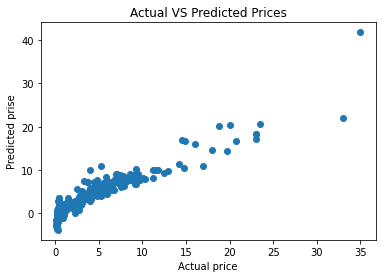

In [25]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel('Predicted prise')
plt.title('Actual VS Predicted Prices')
plt.show

In [26]:
# Prediction on Test Data
test_data_prediction = lin_reg_model.predict(X_test)

In [27]:
# R Squared Test Error
error_score_test = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Test Error : ",error_score_test)

R Squared Test Error :  0.8365766715024661


<function matplotlib.pyplot.show(close=None, block=None)>

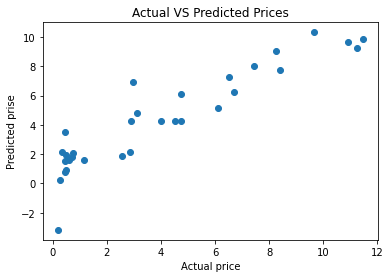

In [29]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel('Predicted prise')
plt.title('Actual VS Predicted Prices')
plt.show

<h5> Lasso Regression

In [31]:
#Loading the Lasso Model
lass_reg_model = Lasso()

In [32]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

<h5> Model Evaluation

In [33]:
# Prediction on Training Data
training_data_prediction_lass = lass_reg_model.predict(X_train)

In [34]:
# R Squared Error
error_score_lass = metrics.r2_score(Y_train,training_data_prediction_lass)
print("R Squared Error Using Lasso Regression : ",error_score_lass)

R Squared Error Using Lasso Regression :  0.8427856123435793


<h2> Visualize the acutal prises and predicted prises

<function matplotlib.pyplot.show(close=None, block=None)>

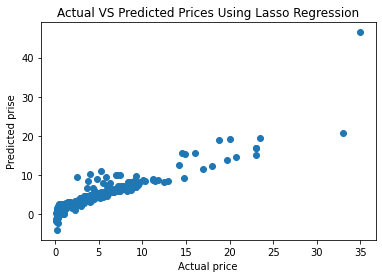

In [38]:
plt.scatter(Y_train, training_data_prediction_lass)
plt.xlabel("Actual price")
plt.ylabel('Predicted prise')
plt.title('Actual VS Predicted Prices Using Lasso Regression')
plt.show

In [39]:
# Prediction on Test Data Using Lasso Regression
test_data_prediction_lass = lass_reg_model.predict(X_test)

In [40]:
# R Squared Error
test_error_score_lass = metrics.r2_score(Y_test,test_data_prediction_lass)
print("R Squared Error Using Lasso Regression : ",test_error_score_lass)

R Squared Error Using Lasso Regression :  0.8709167941173195


<function matplotlib.pyplot.show(close=None, block=None)>

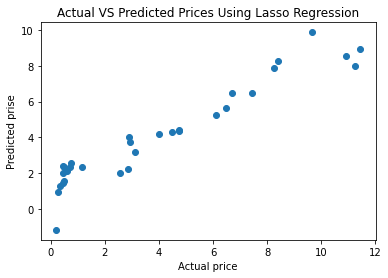

In [41]:
plt.scatter(Y_test, test_data_prediction_lass)
plt.xlabel("Actual price")
plt.ylabel('Predicted prise')
plt.title('Actual VS Predicted Prices Using Lasso Regression')
plt.show